In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np


%matplotlib inline

In [3]:
gourds = pd.read_csv('../data/gourds.csv')
gourds.head(5)

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk
0,2013,F,154.5 lb,1.0,"Ellenbecker, Todd & Sequoia",Gleason,Wisconsin,United States,Nekoosa Giant Pumpkin Fest,209 Werner,Self,184.0,129.0,NaN,154.5
1,2013,F,146.5 lb,2.0,"Razo, Steve",New Middletown,Ohio,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,150.5 Snyder,NaN,194.0,151.0,NaN,146.5
2,2013,F,145.0 lb,3.0,"Ellenbecker, Todd & Sequoia",Glenson,Wisconsin,United States,Mishicot Pumpkin Fest,209 Werner,103 Mackinnon,177.0,115.0,NaN,145.0
3,2013,F,140.8 lb,4.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin '12,209 Werner '12,194.0,151.0,NaN,140.8
4,2013,F,139.0 lb,5.5,"Barlow, John",NaN,Wisconsin,United States,Stillwater Harvestfest,130.5 McKinnon,open,0.0,0.0,NaN,139.0


In [4]:
gourds.country.value_counts()

United States      17070
Canada              4522
Germany             2175
Italy                846
Austria              602
France               405
Belgium              360
Japan                358
United Kingdom       292
The Netherlands      248
Finland              244
Spain                229
Slovenia             167
Switzerland          166
Portugal             149
New Zealand           77
Poland                73
Ireland               21
Australia              5
Unknown country        1
Luxembourg             1
Name: country, dtype: int64

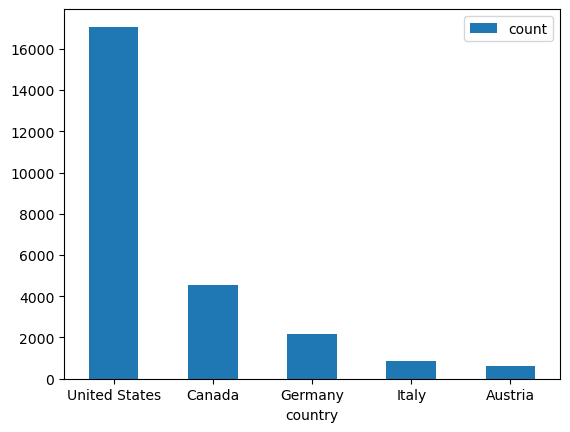

In [5]:
gourds_chart = pd.DataFrame({'country':['United States', 'Canada', 'Germany', 'Italy', 'Austria'],
                       'count':[17070, 4522, 2175, 846, 602]})

ax = gourds_chart.plot.bar(x='country', y='count', rot=0)

3.) United States shows up most frequently.

In [6]:
gourds['weight'] = gourds['weight'].str[:-3]

In [7]:
gourds = gourds.sort_values(['weight'], ascending=[False])

In [8]:
gourds['weight'] = pd.to_numeric(gourds['weight'])

In [9]:
updated_gourds = gourds.loc[gourds.groupby("year")["weight"].idxmax()]

In [10]:
updated_gourds

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk
494,2013,P,2032.0,1.0,"Mathison, Tim",Napa,California,United States,Uesugi Farms Weigh-off,2009 Wallace,1554 Mathison,475.0,2000.0,NaN,2032.0
3403,2014,P,2323.7,1.0,"Meier, Beni",Pfungen,Other,Switzerland,Europameisterschaft im Kurbiswiegen,2009 Wallace,2328 Meier DMG,479.0,2035.0,NaN,2323.7
6599,2015,P,2230.5,1.0,"Wallace, Ron",Greene,Rhode Island,United States,SNGPG Frerichs Farm Weigh-off,2009 Wallace,1916 Barron,467.0,1929.0,NaN,2230.5
9964,2016,P,2624.6,1.0,"Willemijns, Mathias",Deurle,East Flanders,Belgium,Europameisterschaft im Kurbiswiegen,2145 McMullen,1872 Willemijns,496.0,2175.0,NaN,2624.6
13114,2017,P,2363.0,1.0,"Holland, Joel",Sumner,Washington,United States,Safeway World Championship Pumpkin Weigh-Off,2145.5 McMullen,2261.5 Wallace,473.0,2132.0,NaN,2363.0
16260,2018,P,2528.0,1.0,"Geddes, Steve",Boscawen,New Hampshire,United States,Deerfield Fair,1911 Urena,1803 Gadberry,490.0,2307.0,NaN,2528.0
19578,2019,P,2517.0,1.0,"Haist, Karl & Beverly",Clarence Center,New York,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,2005 Haist,self,493.0,2332.0,NaN,2517.0
22871,2020,P,2593.7,1.0,"Paton, Ian & Stuart",Everton nr. Lymington,England,United Kingdom,Royal Victoria Country Park,"1875 MENDI ""B""",2005 HAIST,502.0,2431.0,NaN,2593.7
25730,2021,P,2702.9,1.0,"Cutrupi, Stefano",Radda in Chianti,Tuscany,Italy,Campionato dello Zuccone,1885.5 Werner,Self,514.0,2553.0,NaN,2702.9


4.) Heaviest gourd is 2702lbs, from Tuscany, Italy.

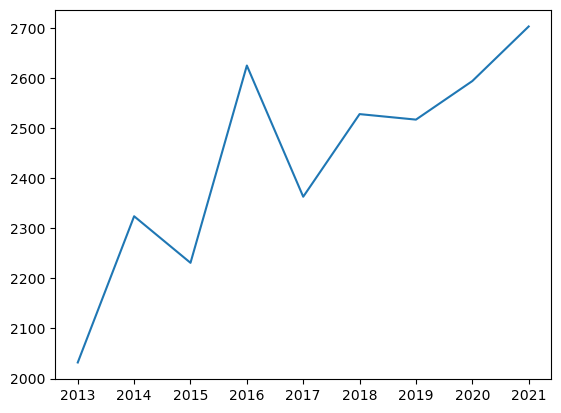

In [11]:
y = [2032, 2324, 2231, 2625, 2363, 2528, 2517, 2594, 2703]
x = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
plt.plot(x, y)
plt.show()

5.) Gourds are getting heavier through the years.

In [12]:
type_name = pd.read_csv('../data/type_name.csv')
type_name

,type_id,type_name
0,F,Field Pumpkin
1,P,Giant Pumpkin
2,S,Giant Squash
3,W,Giant Watermelon
4,T,Tomato
5,L,Long Gourd


In [13]:
type_gourds = pd.merge(gourds, type_name, on='type_id', how='inner')
type_gourds.shape

(28011, 16)

In [14]:
type_gourds

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk,type_name
0,2019,P,999.80,556.0,"Verbraeken, alois",Rijkevorsel,Antwerp,Belgium,Belgisch Kampioenschap pompoenwegen,"1867,3Biermans2018","1867,3Biermans2018",350.0,982.0,NaN,999.80,Giant Pumpkin
1,2015,P,999.60,652.0,"Brareu, Team",Niederdorfelden,Other,Germany,Europameisterschaft im Kurbiswiegen,2102 Meier 14,self,366.0,1075.0,NaN,999.60,Giant Pumpkin
2,2013,P,999.50,379.5,"Leland, Neal",Canby,Oregon,United States,Baumans Farm Giant Pumpkin Weigh-off,1789 Wallace,1041.5 McKie,356.0,994.0,NaN,999.50,Giant Pumpkin
3,2013,P,999.50,379.5,"Magarian, Marc",Goffstown,New Hampshire,United States,Deerfield Fair,1381 Checkon,1843 Geddes,370.0,1105.0,NaN,999.50,Giant Pumpkin
4,2015,P,999.50,653.0,"Christensen, Brian",Rexburg,Idaho,United States,Thanksgiving Point,1561 Reeb,1003 Christensen,363.0,1049.0,NaN,999.50,Giant Pumpkin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28006,2021,T,0.28,369.0,"Lambert, Tess",Barrington,New Hampshire,United States,Deerfield Fair,NaN,NaN,NaN,NaN,NaN,0.28,Tomato
28007,2018,T,0.25,365.0,"Faust, Del and Julie",Fond Du Lac,Wisconsin,United States,Mishicot Pumpkin Fest,7.0 VanderWielen,NaN,NaN,NaN,NaN,0.25,Tomato
28008,2016,T,0.24,326.0,"D'entremont, Quinn",Glenwood,Nova Scotia,Canada,The Great Howard Dill Giant Pumpkin Classic,NaN,NaN,NaN,NaN,NaN,0.24,Tomato
28009,2021,T,0.21,370.0,"Ritter, Leif",Aurora,Colorado,United States,Early Tomatoes,9.44 La Rue,self,NaN,NaN,Domingo,0.21,Tomato


In [15]:
type_gourds_byweight = type_gourds.groupby(['type_name']).mean()
type_gourds_byweight

,year,weight,place,ott,est_weight,weight_bk
type_name,,,,,,
Field Pumpkin,2016.876229,79.456309,154.293775,58.461230,37.345832,79.456309
Giant Pumpkin,2016.886438,776.033885,893.706568,266.681812,695.968413,776.033885
Giant Squash,2016.935599,527.298348,95.251640,205.439475,431.540847,527.298348
Giant Watermelon,2016.987689,127.149110,140.855838,103.721207,96.137014,127.149110
Long Gourd,2017.061350,94.567945,110.448875,5.306237,0.581800,94.567945
Tomato,2017.286665,3.176921,179.193538,NaN,NaN,3.176921


6.) Giant pumpkins are heaviest on average.

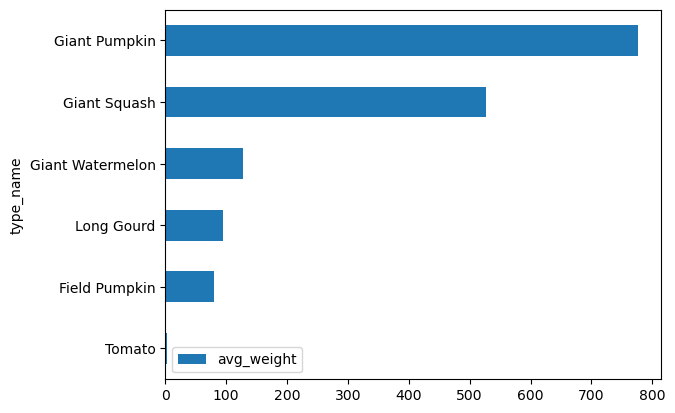

In [16]:
gourds_chart = pd.DataFrame({'type_name':['Tomato', 'Field Pumpkin', 'Long Gourd', 'Giant Watermelon', 'Giant Squash', 'Giant Pumpkin'],
                       'avg_weight':[3.18, 79.5, 94.6, 127, 527, 776]})

ax = gourds_chart.plot.barh(x='type_name', y='avg_weight', rot=0)

In [17]:
type_gourds['weight_error'] = type_gourds['weight'] - type_gourds['est_weight']
error_gourds = type_gourds.sort_values(['weight_error'], ascending=[False])
error_gourds = error_gourds[error_gourds['est_weight'] != 0.0]

In [43]:
error_gourds = error_gourds[error_gourds['weight_error'].notna()]
error_gourds.tail(1)

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk,type_name,weight_error
8320,2019,P,316.0,1403.0,"Shenfish, Gary",Littleton,Colorado,United States,Fort Collins Nursery Weigh-off,2170 Daletes,1911 Urena,1132.0,11033.0,NaN,316.0,Giant Pumpkin,-10717.0


7.) Worst over-estimation is the one above. It was an estimated weight of 11,000lbs when the actual weight was 316lbs.

In [45]:
error_gourds

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk,type_name,weight_error
12818,2014,P,1339.4,236.0,"Sundin, Eric",Stoney Creek,Ontario,Canada,Port Elgin Pumpkinfest,702 Sundin,1442 Metesa,194.0,170.0,NaN,1339.4,Giant Pumpkin,1169.4
11509,2016,P,1536.5,151.0,"Tessier, David",N-D Mont-Carmel,Quebec,Canada,Port Elgin Pumpkinfest,1965 Brandt,Self,262.0,404.0,NaN,1536.5,Giant Pumpkin,1132.5
719,2015,P,930.0,745.0,Team Grams,Fox Lake,Wisconsin,United States,Nekoosa Giant Pumpkin Fest,1037 Bird-Gantner,NaN,190.0,161.0,NaN,930.0,Giant Pumpkin,769.0
1534,2018,P,859.0,772.5,"Jarvis, Joel",St.Thomas,Ontario,Canada,Port Elgin Pumpkinfest,150 Butler,1803 Houle,158.0,96.0,NaN,859.0,Giant Pumpkin,763.0
1357,2018,P,874.5,754.0,"Court, Tamri",Port Elgin,Ontario,Canada,Port Elgin Pumpkinfest (Sunday),154 Lyons,self,181.0,140.0,NaN,874.5,Giant Pumpkin,734.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2014,P,803.0,800.0,"Powell, Jesse",Oil Springs,Ontario,Canada,Port Elgin Pumpkinfest,411 Powell,411 Powell,517.0,2336.0,NaN,803.0,Giant Pumpkin,-1533.0
16225,2017,S,732.0,56.5,"Sikorski, John",Suring,Wisconsin,United States,Mishicot Pumpkin Fest,1196 Martin,selfed,496.0,2369.0,NaN,732.0,Giant Squash,-1637.0
19388,2016,W,160.5,94.0,"Thompson, Travis",Florence,Ontario,Canada,Port Elgin Pumpkinfest (Sunday),193 Mitchell,193 Mitchell,0.0,1887.0,NaN,160.5,Giant Watermelon,-1726.5
12248,2017,P,1419.8,231.0,"Wuersching, Matthias",Einhausen,Hesse,Germany,Early Weigh-off Ludwigsburg,1781 Zywiec,900 Gansert,1072.0,9819.0,NaN,1419.8,Giant Pumpkin,-8399.2


In [44]:
print(error_gourds[(error_gourds[['weight_error']]<0).all(axis=1)])

       year type_id  weight   place                  grower_name         city  \
20127  2016       W   100.9   181.0  Bartoli, Roberto e Federico          NaN   
18373  2016       W     4.9   291.0               Brumaghim, Tim   Cobleskill   
23716  2020       F    48.9   186.0                Kobel, Stefan     Elmstein   
6128   2015       P   489.9  1374.0            Martini, Guenther       Merzig   
728    2014       P   929.9   641.0                 Mendi, Ruben    Valtierra   
...     ...     ...     ...     ...                          ...          ...   
2186   2014       P   803.0   800.0                Powell, Jesse  Oil Springs   
16225  2017       S   732.0    56.5               Sikorski, John       Suring   
19388  2016       W   160.5    94.0             Thompson, Travis     Florence   
12248  2017       P  1419.8   231.0         Wuersching, Matthias    Einhausen   
8320   2019       P   316.0  1403.0               Shenfish, Gary    Littleton   

                 state_prov

In [46]:
(8421/17059)*100

49.36397209684038

7b.) About 49% of estimated weights are over-estimations.

In [47]:
type_gourds[['weight', 'est_weight']].corr()

,weight,est_weight
weight,1.000000,0.907881
est_weight,0.907881,1.000000


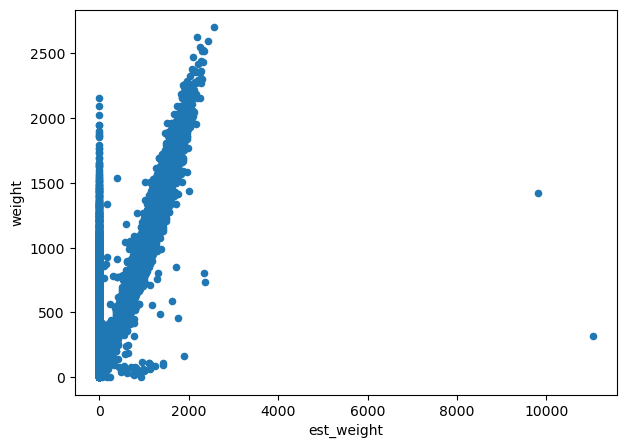

In [20]:
type_gourds.plot(kind = 'scatter',
             x = 'est_weight',
             y = 'weight',
             figsize = (7,5));

8.) There is quite a positive correlation when it comes to comparing estimated weight with actual weight, meaning estimations are fairly accurate. I did also notice that people tended to underestimate a gourd's size, for all types.

In [21]:
winning_gourds =  type_gourds[type_gourds['place'] < 11]

In [22]:
winning_gourds

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk,type_name,weight_error
8929,2021,P,2702.90,1.0,"Cutrupi, Stefano",Radda in Chianti,Tuscany,Italy,Campionato dello Zuccone,1885.5 Werner,Self,514.0,2553.0,NaN,2702.90,Giant Pumpkin,149.9
9035,2016,P,2624.60,1.0,"Willemijns, Mathias",Deurle,East Flanders,Belgium,Europameisterschaft im Kurbiswiegen,2145 McMullen,1872 Willemijns,496.0,2175.0,NaN,2624.60,Giant Pumpkin,449.6
9084,2020,P,2593.70,1.0,"Paton, Ian & Stuart",Everton nr. Lymington,England,United Kingdom,Royal Victoria Country Park,"1875 MENDI ""B""",2005 HAIST,502.0,2431.0,NaN,2593.70,Giant Pumpkin,162.7
9124,2020,P,2551.90,2.0,"Mendi, Ruben",VALTIERRA,Navarre,Spain,Concurso Calabazas Gigantes de Valtierra,2183.7 Mendi 2019,self,485.0,2255.0,NaN,2551.90,Giant Pumpkin,296.9
9152,2018,P,2528.00,1.0,"Geddes, Steve",Boscawen,New Hampshire,United States,Deerfield Fair,1911 Urena,1803 Gadberry,490.0,2307.0,NaN,2528.00,Giant Pumpkin,221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25076,2013,T,5.33,7.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Early Tomatoes,4.79 Martin 11,open,NaN,NaN,NaN,5.33,Tomato,NaN
25103,2013,T,5.22,8.0,"Hunt, Phil & Jane",Cameron,Ontario,Canada,Early Tomatoes,5.5 Johnson/ Butler,Open,NaN,NaN,NaN,5.22,Tomato,NaN
25113,2013,T,5.20,9.0,"Chris, Lyons",Scarborough,Ontario,Canada,Early Tomatoes,5.5 Johnson/Butler,self,NaN,NaN,NaN,5.20,Tomato,NaN
25130,2013,T,5.14,10.0,"Montgomery, Greg",Port Carling,Ontario,Canada,Early Tomatoes,4.29 Boudyo,NaN,NaN,NaN,NaN,5.14,Tomato,NaN


In [23]:
growers_gourd = winning_gourds.groupby(['grower_name', 'type_id']).agg({'place': ['count']})
growers_gourd.columns = ['type_count']
growers_gourd = growers_gourd.reset_index()
print(growers_gourd)

               grower_name type_id  type_count
0              Alan, Eaton       L           2
1        Ansems, Catharina       L           2
2            Ansems, Frank       L           4
3             Ansems, Fred       L           4
4             Ansems, Fred       S           1
..                     ...     ...         ...
279  Zappa, Lee and Derrik       S           1
280        Zywiec, Lorelee       P           1
281            kent, Chris       W           5
282       team, Willemijns       P           1
283           vial, Andrew       W           2

[284 rows x 3 columns]


In [30]:
growers_gourd['grower_name'].mode()

0    Martin, Margaret & Glen
Name: grower_name, dtype: object

In [36]:
theglens = winning_gourds.loc[winning_gourds['grower_name'] == 'Martin, Margaret & Glen']
theglens

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk,type_name,weight_error
17478,2016,S,1196.00,8.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Nekoosa Giant Pumpkin Fest,1262 Jutras,1094.6 Butler,381.0,1191.0,NaN,1196.00,Giant Squash,5.00
17546,2014,S,1103.60,10.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,1023.5 Martin '13,1264 Pierpont '13,363.0,1045.0,NaN,1103.60,Giant Squash,58.60
21313,2014,L,130.38,5.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,121.25 Martin '13,137.75 Wright '12,0.0,0.0,NaN,130.38,Long Gourd,130.38
24242,2013,F,140.80,4.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin '12,209 Werner '12,194.0,151.0,NaN,140.80,Field Pumpkin,-10.20
24878,2014,T,7.45,2.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,5.63 Martin uof '13 (big zac),open,NaN,NaN,Big Zac,7.45,Tomato,NaN
25076,2013,T,5.33,7.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Early Tomatoes,4.79 Martin 11,open,NaN,NaN,NaN,5.33,Tomato,NaN


9.) Margaret & Glen Martin have top 10 finishes among the most categories (5). Their best finish is 2nd, with a seven and a half pound tomato. (impressive)
Answered this question by finding the mode in the grower_name column, then made a dataframe with those particular strings in the name column. This led me to find all the top 10s that the Glens grew.

In [27]:
mother_count = type_gourds.seed_mother.value_counts()
print(mother_count.to_string())

unknown                                               277
Unknown                                               260
2145 McMullen                                         122
2009 Wallace                                          104
1985 Miller                                            89
1911 Urena                                             72
2363 Holland                                           61
81 Wolf                                                61
2008 Neptune                                           60
1495 Stelts                                            52
316 Edwards                                            47
1317 Clementz                                          42
2032 Mathison                                          42
2230 Wallace                                           39
Big Zac                                                37
1937 Urena                                             36
2528 Geddes                                            36
1676.5 Daletas

In [28]:
father_count = type_gourds.pollinator_father.value_counts()
print(father_count.to_string())

open                                                  2658
Open                                                  2065
self                                                  2020
Self                                                  1875
2009 Wallace                                           146
2145 McMullen                                          125
unknown                                                114
Unknown                                                100
sib                                                     80
1985 Miller                                             69
1911 Urena                                              63
SELF                                                    60
OPEN                                                    58
2363 Holland                                            57
2032 Mathison                                           54
sibb                                                    53
1916 Barron                                             

two known gourds appeared to have been the mother seed at least 100 times, with most of the mother plants being "unknown". As for pollinators/"fathers", there seems to be at least four known pollinators that have reached at least 100 offspring. There is also "open", "self", and "unknown" that have reached 100 offspring. 

In [49]:
question10c = type_gourds[['year', 'type_name', 'gpc_site', 'seed_mother', 'pollinator_father']].copy()
question10c

,year,type_name,gpc_site,seed_mother,pollinator_father
0,2019,Giant Pumpkin,Belgisch Kampioenschap pompoenwegen,"1867,3Biermans2018","1867,3Biermans2018"
1,2015,Giant Pumpkin,Europameisterschaft im Kurbiswiegen,2102 Meier 14,self
2,2013,Giant Pumpkin,Baumans Farm Giant Pumpkin Weigh-off,1789 Wallace,1041.5 McKie
3,2013,Giant Pumpkin,Deerfield Fair,1381 Checkon,1843 Geddes
4,2015,Giant Pumpkin,Thanksgiving Point,1561 Reeb,1003 Christensen
...,...,...,...,...,...
28006,2021,Tomato,Deerfield Fair,NaN,NaN
28007,2018,Tomato,Mishicot Pumpkin Fest,7.0 VanderWielen,NaN
28008,2016,Tomato,The Great Howard Dill Giant Pumpkin Classic,NaN,NaN
28009,2021,Tomato,Early Tomatoes,9.44 La Rue,self


In [53]:
question10c["parents"] = question10c["seed_mother"] + question10c["pollinator_father"]
question10c = question10c[question10c['parents'].notna()]
question10c

,year,type_name,gpc_site,seed_mother,pollinator_father,parents
0,2019,Giant Pumpkin,Belgisch Kampioenschap pompoenwegen,"1867,3Biermans2018","1867,3Biermans2018","1867,3Biermans20181867,3Biermans2018"
1,2015,Giant Pumpkin,Europameisterschaft im Kurbiswiegen,2102 Meier 14,self,2102 Meier 14self
2,2013,Giant Pumpkin,Baumans Farm Giant Pumpkin Weigh-off,1789 Wallace,1041.5 McKie,1789 Wallace1041.5 McKie
3,2013,Giant Pumpkin,Deerfield Fair,1381 Checkon,1843 Geddes,1381 Checkon1843 Geddes
4,2015,Giant Pumpkin,Thanksgiving Point,1561 Reeb,1003 Christensen,1561 Reeb1003 Christensen
...,...,...,...,...,...,...
27996,2014,Tomato,Country Farm and Feed,3.6 english,open,3.6 englishopen
27998,2021,Tomato,Nicks Garden Center Weigh-off,4.28 SPAZIANI,SELF,4.28 SPAZIANISELF
28001,2020,Tomato,Nicks Garden Center Weigh-off,5.59 Zappa,self,5.59 Zappaself
28005,2020,Tomato,Smith Farms Giant Pumpkin Weigh-off,VANDER WIELEN,SELF,VANDER WIELENSELF


In [56]:
parent_count = question10c['parents'].value_counts()
parent_count.head(25)

unknownopen                       127
unknownunknown                     90
UnknownUnknown                     80
UnknownOpen                        65
OpenOpen                           23
Unknownopen                        23
openopen                           22
306 Bartoli 2013open               13
207.2 '19 Bartoli Gabrieleopen     13
81 Wolfopen                        13
2145 McMullenself                  13
81 Wolfself                        13
293 Bartoli Gabrieleopen           13
302 KentSelf                       12
1911 UrenaSelf                     12
316 Edwardsopen                    12
1495 Stelts2009 Wallace            12
4.28 SpazianiOpen                  11
305 MuddSelf                       10
7.10 FossOpen                      10
140 Crewsself                      10
6.66 Spazianiopen                  10
Dillopen                           10
2005 HaistSelf                     10
245 BartoliOpen                    10
Name: parents, dtype: int64

10c.) It seems as though no known/named parent combination accounted for at least 100 offspring that has been weighed. 